# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [4]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

df = pd.read_csv('retailmax.csv')

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

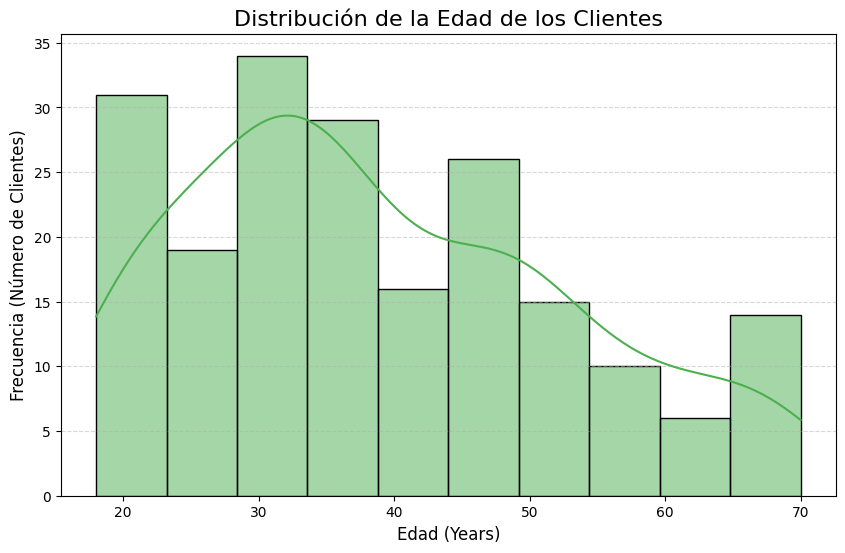

In [5]:
# tu código aquí
columna_a_graficar = 'Age'

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x=columna_a_graficar,
    bins=10,
    kde=True,
    color='#4CAF50',
    edgecolor='black'
)
plt.title(f'Distribución de la Edad de los Clientes', fontsize=16)
plt.xlabel('Edad (Years)', fontsize=12)
plt.ylabel('Frecuencia (Número de Clientes)', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')

plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

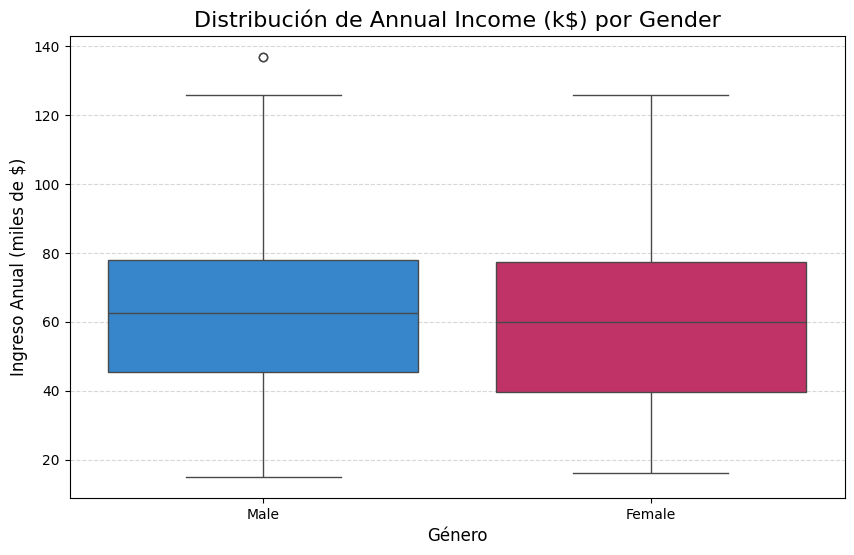

In [6]:
columna_numerica = 'Annual Income (k$)'
columna_categorica = 'Gender'

plt.figure(figsize=(10, 6))

# Usamos sns.boxplot()
# x: La variable categórica (Género)
# y: La variable numérica (Ingreso Anual)
# palette: Define los colores de las cajas
sns.boxplot(
    data=df,
    x=columna_categorica,
    y=columna_numerica,
    palette={'Male': '#1E88E5', 'Female': '#D81B60'} # Azules y Rosas
)

plt.title(f'Distribución de {columna_numerica} por {columna_categorica}', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingreso Anual (miles de $)', fontsize=12)

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

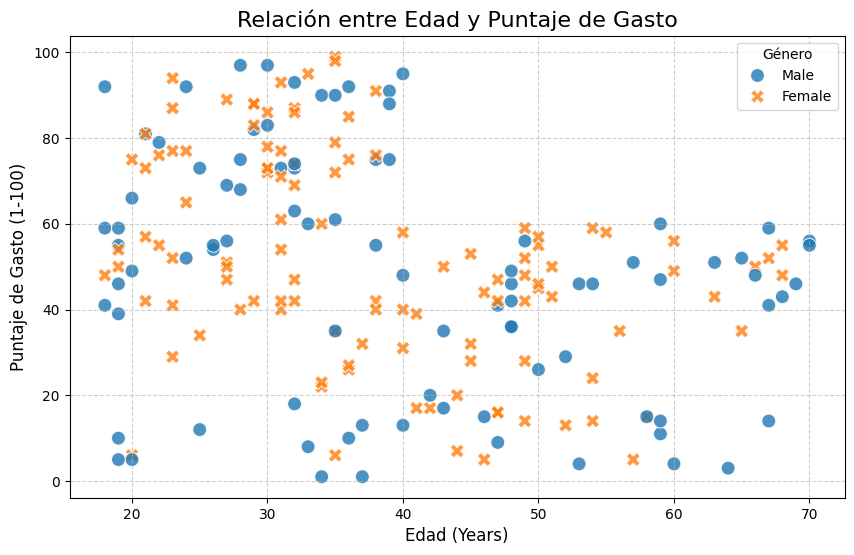

In [7]:
plt.figure(figsize=(10, 6))

# Usamos sns.scatterplot()
# x: Edad
# y: Puntaje de Gasto
# hue: Opcional, pero útil para añadir el Género y ver si influye en el patrón.
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='Gender',  # Colorea los puntos por Género
    style='Gender', # Usa diferentes marcadores por Género
    s=100,         # Tamaño de los puntos
    alpha=0.8      # Transparencia
)

plt.title('Relación entre Edad y Puntaje de Gasto', fontsize=16)
plt.xlabel('Edad (Years)', fontsize=12)
plt.ylabel('Puntaje de Gasto (1-100)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

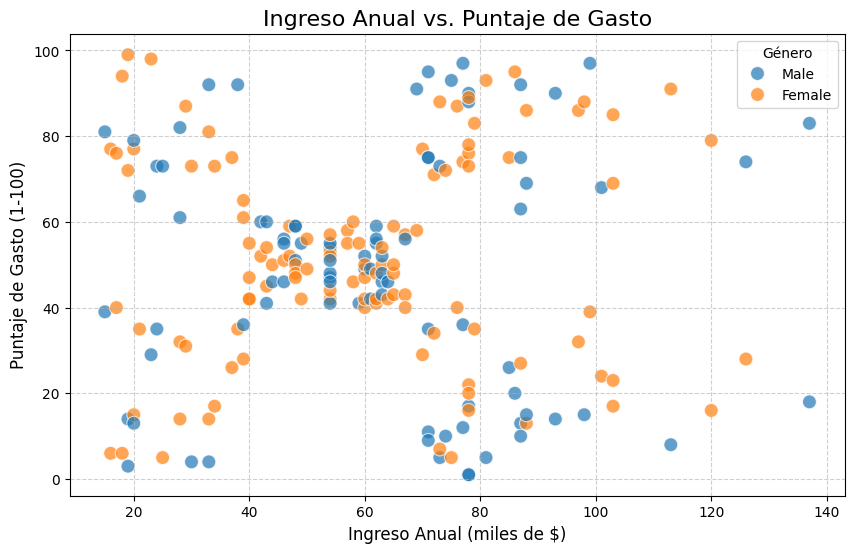

In [8]:
x_columna = 'Annual Income (k$)'
y_columna = 'Spending Score (1-100)'

# 3. Configuración y Creación del Gráfico de Dispersión
plt.figure(figsize=(10, 6))

# Usamos sns.scatterplot()
# Puedes colorear por Género para ver si hay un patrón adicional.
sns.scatterplot(
    data=df,
    x=x_columna,
    y=y_columna,
    hue='Gender',  # Colorea por Género
    s=100,         # Tamaño de los puntos
    alpha=0.7      # Transparencia
)

# 4. Añadir Título y Etiquetas
plt.title('Ingreso Anual vs. Puntaje de Gasto', fontsize=16)
plt.xlabel('Ingreso Anual (miles de $)', fontsize=12)
plt.ylabel('Puntaje de Gasto (1-100)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

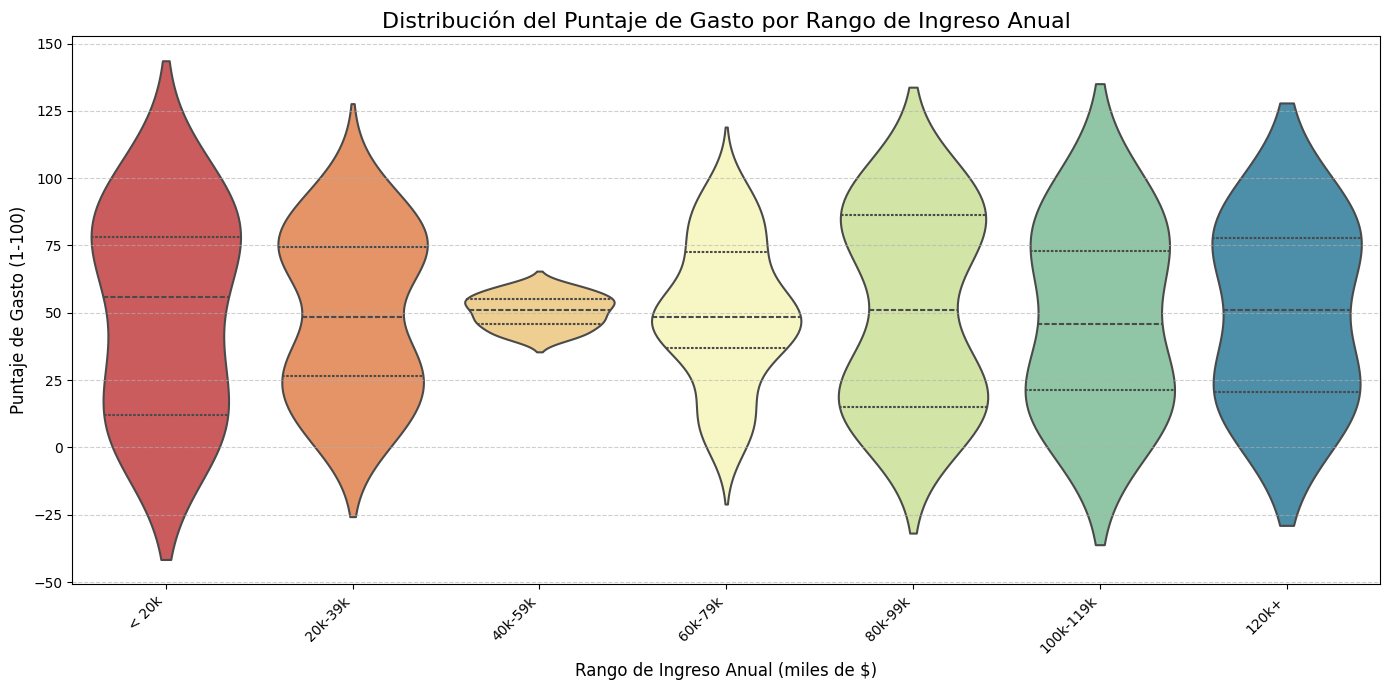

In [9]:
bins = [0, 20, 40, 60, 80, 100, 120, 140]
labels = ['< 20k', '20k-39k', '40k-59k', '60k-79k', '80k-99k', '100k-119k', '120k+']

# Usamos pd.cut() para asignar cada cliente a un grupo de ingreso
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels, right=False)

# 3. Configuración y Creación del Gráfico de Violín
plt.figure(figsize=(14, 7))

# Usamos sns.violinplot()
# x: Los rangos de ingreso (categórico)
# y: El puntaje de gasto (numérico)
sns.violinplot(
    data=df,
    x='Income Group',
    y='Spending Score (1-100)',
    palette='Spectral', # Esquema de colores
    inner='quartile',   # Muestra los cuartiles dentro del violín
    linewidth=1.5
)


# 4. Añadir Título y Etiquetas
plt.title('Distribución del Puntaje de Gasto por Rango de Ingreso Anual', fontsize=16)
plt.xlabel('Rango de Ingreso Anual (miles de $)', fontsize=12)
plt.ylabel('Puntaje de Gasto (1-100)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta automáticamente los parámetros para que encajen los labels
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

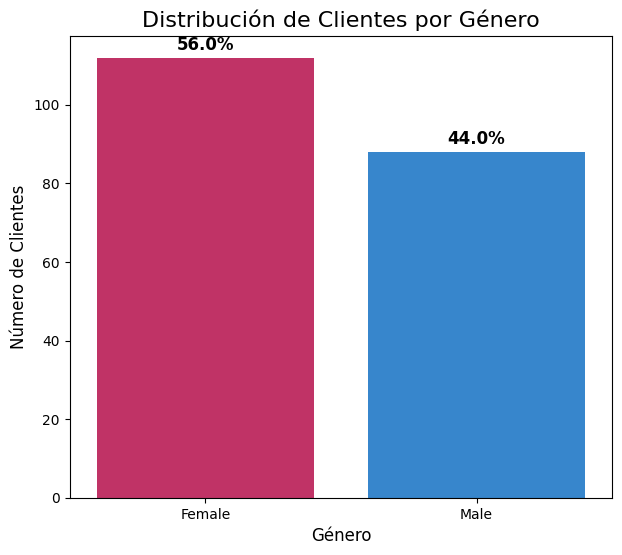

In [10]:
# 2. Contar la frecuencia de cada género
gender_counts = df['Gender'].value_counts()
total_clientes = len(df)

# Calcular el porcentaje para las etiquetas
gender_percentages = (gender_counts / total_clientes) * 100

# 3. Configuración y Creación de la Gráfica de Barras
plt.figure(figsize=(7, 6))

# Usamos sns.barplot()
sns.barplot(
    x=gender_counts.index,  # Categorías (Male, Female)
    y=gender_counts.values, # Frecuencia (Conteo)
    palette={'Male': '#1E88E5', 'Female': '#D81B60'}
)

# Añadir etiquetas de porcentaje sobre cada barra
for i, count in enumerate(gender_counts.values):
    percentage = gender_percentages.iloc[i]
    plt.text(
        i,                      # Posición X
        count + 2,              # Posición Y (ligeramente por encima de la barra)
        f'{percentage:.1f}%',   # Texto del porcentaje
        ha='center',            # Alineación horizontal
        fontsize=12,
        weight='bold'
    )

# 4. Añadir Título y Etiquetas
plt.title('Distribución de Clientes por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

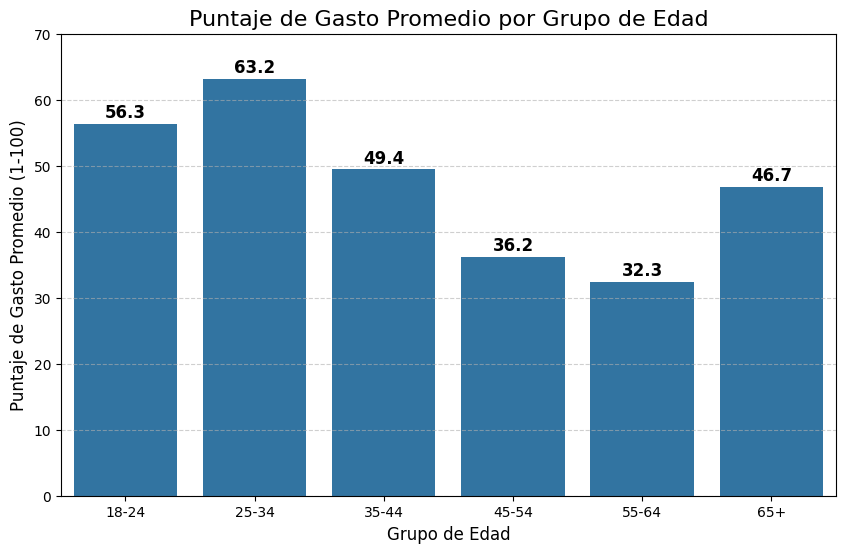

In [12]:
bins = [18, 25, 35, 45, 55, 65, df['Age'].max() + 1] # Rango que cubre desde 18 hasta el máximo.
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

average_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(
    data=average_spending,
    x='Age Group',
    y='Spending Score (1-100)',
)

for index, row in average_spending.iterrows():
    plt.text(
        index,
        row['Spending Score (1-100)'] + 1,  # Posición Y (ligeramente por encima de la barra)
        f'{row["Spending Score (1-100)"]:.1f}', # Valor con un decimal
        ha='center',
        fontsize=12,
        weight='bold'
    )

# 5. Añadir Título y Etiquetas
plt.title('Puntaje de Gasto Promedio por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Puntaje de Gasto Promedio (1-100)', fontsize=12)
plt.ylim(0, 70) # Establecer un límite superior para que las etiquetas encajen mejor

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

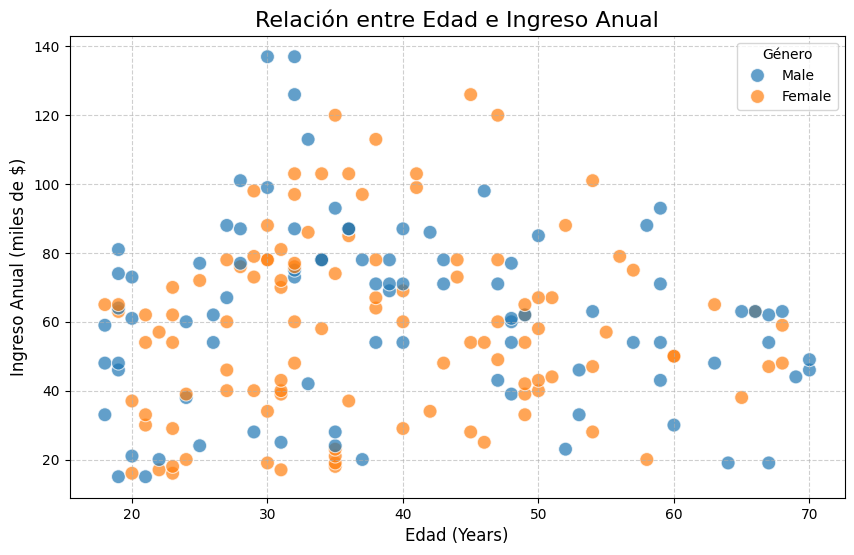

In [13]:
x_columna = 'Age'
y_columna = 'Annual Income (k$)'

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x=x_columna,
    y=y_columna,
    hue='Gender',  # Colorea los puntos por Género
    s=100,         # Tamaño de los puntos
    alpha=0.7      # Transparencia
)

plt.title('Relación entre Edad e Ingreso Anual', fontsize=16)
plt.xlabel('Edad (Years)', fontsize=12)
plt.ylabel('Ingreso Anual (miles de $)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

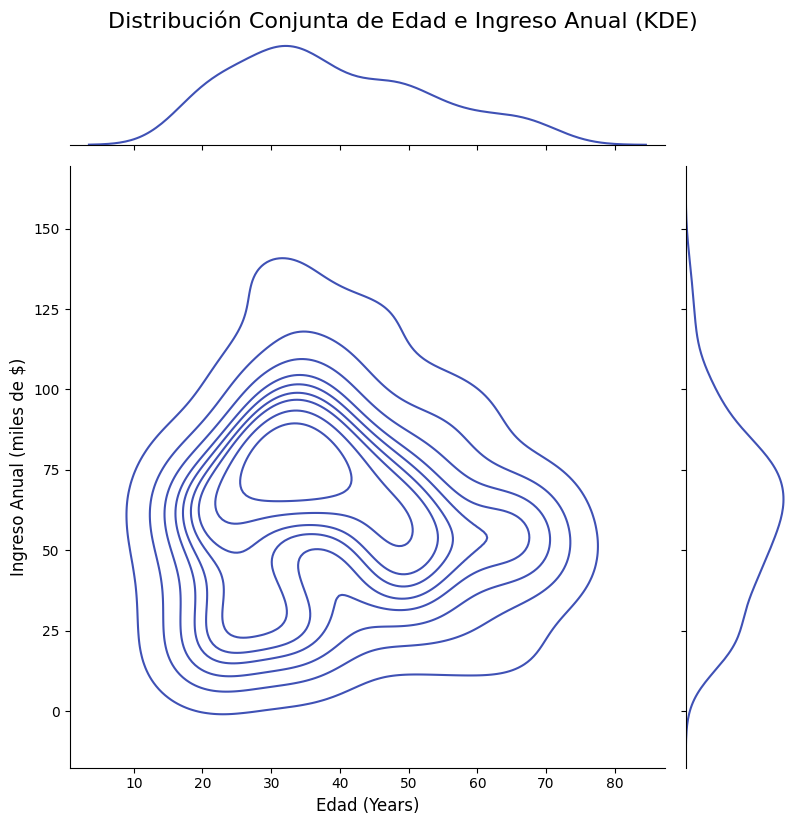

In [15]:
x_columna = 'Age'
y_columna = 'Annual Income (k$)'

g = sns.jointplot(
    data=df,
    x=x_columna,
    y=y_columna,
    kind='kde',  # Muestra el contorno de densidad
    color='#3F51B5',
    height=8     # Tamaño del gráfico
)

g.ax_joint.set_xlabel('Edad (Years)', fontsize=12)
g.ax_joint.set_ylabel('Ingreso Anual (miles de $)', fontsize=12)
g.fig.suptitle(f'Distribución Conjunta de Edad e Ingreso Anual (KDE)', fontsize=16, y=1.02)

plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

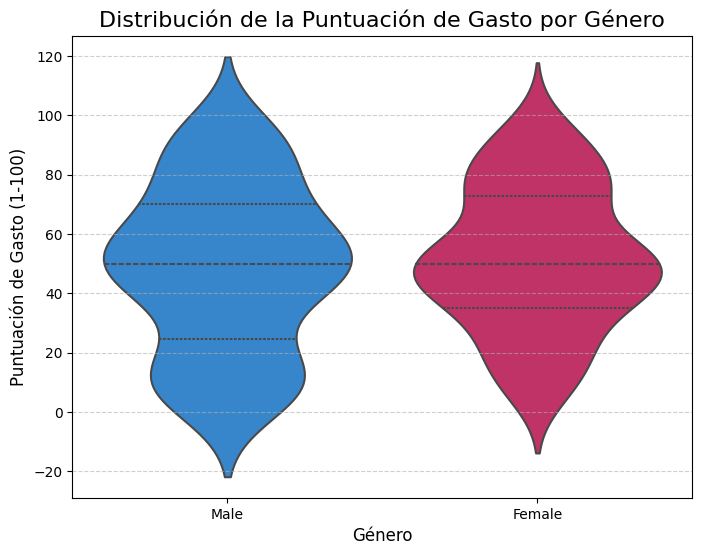

In [16]:
x_columna = 'Gender'
y_columna = 'Spending Score (1-100)'

plt.figure(figsize=(8, 6))

sns.violinplot(
    data=df,
    x=x_columna,
    y=y_columna,
    palette={'Male': '#1E88E5', 'Female': '#D81B60'}, # Colores distintivos
    inner='quartile',
    linewidth=1.5
)


plt.title('Distribución de la Puntuación de Gasto por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()